### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

### Reading Data

In [2]:
file = 'MAL Anime Reviews 85k.csv'
reviews = pd.read_csv(file)
reviews.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and..."
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,Since I couldn't find any legitimate objective...


## Some elementary data analysis to see what we're working with

In [3]:
print(f"Average overall rating: {round(reviews['Overall Rating'].mean(), 2)}")
print(f"Average story rating: {round(reviews['Story Rating'].mean(), 2)}")
print(f"Average animation rating: {round(reviews['Animation Rating'].mean(), 2)}")
print(f"Average character rating: {round(reviews['Character Rating'].mean(), 2)}")
print(f"Average Enjoyment rating: {round(reviews['Enjoyment Rating'].mean(), 2)}")

Average overall rating: 7.43
Average story rating: 6.7
Average animation rating: 7.47
Average character rating: 7.0
Average Enjoyment rating: 7.25


### Checking out review column

In [4]:
reviews['Review'].apply(lambda review: len(review))

0         5291
1         9250
2        17050
3        13079
4         3028
         ...  
85948     8135
85949     5866
85950      701
85951    10666
85952      978
Name: Review, Length: 85953, dtype: int64

Looks like we've got some relatively short reviews, and some very passionate, lengthy ones as well! These people really put their time and effort into giving a thoughtful review so that others can take it into consideration when deciding whether or not to watch an anime.

### Let's see when reviews were published on the site

In [5]:
reviews['Review Date']

0        Jan 25, 2010
1        Nov 15, 2010
2         Apr 7, 2015
3        Apr 25, 2015
4        Jul 29, 2015
             ...     
85948     Jul 9, 2020
85949    Jun 15, 2020
85950    Jun 14, 2020
85951    Jun 11, 2020
85952    May 21, 2020
Name: Review Date, Length: 85953, dtype: object

Since our Review Date column is in string format, let's convert it to a date\[time\] object so that we can extract the year from it.

In [6]:
reviews['Year of Review'] = pd.to_datetime(reviews['Review Date'], format='%b %d, %Y').dt.year
reviews.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and...",2010
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...,2010
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...,2015
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...,2015
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,Since I couldn't find any legitimate objective...,2015


Now we wish to see how many reviews were published per year

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

In [8]:
revs_by_year = reviews.groupby(by=['Year of Review'], as_index=False).size()
revs_by_year

,Year of Review,size
0,2006,30
1,2007,942
2,2008,3177
3,2009,3214
4,2010,3387
5,2011,3438
6,2012,4503
7,2013,5468
8,2014,6462
9,2015,9185


Text(0, 0.5, '# of Reviews Published')

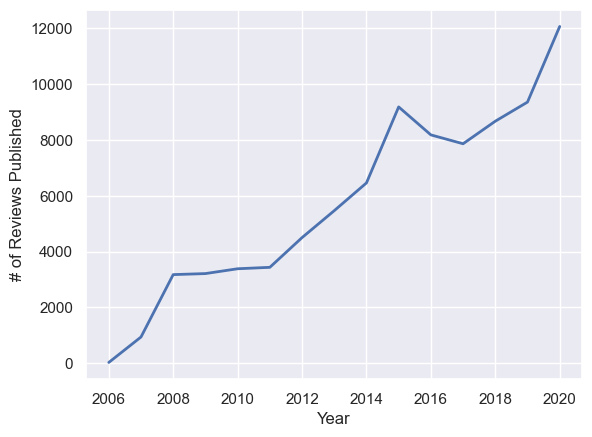

In [9]:
ax = sns.lineplot(data=revs_by_year, x='Year of Review', y='size', linewidth=2)
plt.rcParams["figure.figsize"] = (9,5)
ax.set_xlabel('Year')
ax.set_ylabel('# of Reviews Published')

We observe that the number of reviews has increased in a linear fashion. This can be attributed to the rise of the internet and more people being able to watch anime and thus comment their thoughts.

In [10]:
len(reviews['Anime Title'].unique())

4315

There are 4315 unique titles that people have written reviews on, great! 

### Let us see what the overall composition of the dataset is in terms of positive/negative reviews:

For the sake of simplicity, we will classify any review that has an Overall Rating of 6 or more to be Positive, and any review that has an Overall Rating of 5 or less to be Negative.  

In [11]:
score_filter = reviews['Overall Rating'] >= 6
print(len(reviews.loc[score_filter]))
print(len(reviews.loc[~score_filter]))

70455
15498



If we split this training set (which we will do later) based on the number of negative reviews, this gives us around 15500 reviews of each type (Positive/Negative) to train our model with.

### Creating a Sentiment column

In [12]:
reviews['Sentiment'] = reviews['Overall Rating'].apply(lambda rating: 'Positive' if rating >= 6 else 'Negative')
reviews.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review,Sentiment
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and...",2010,Positive
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...,2010,Positive
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...,2015,Positive
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...,2015,Positive
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446,5,2,7,7,8,5,Since I couldn't find any legitimate objective...,2015,Negative


What we have done is assign a sentiment to each review based on the Overall Rating column. This will help us train our model when we split up our data into a test set and a training set.

### Creating a training set and test set from our dataframe

Let's use our score filter from earlier to get the positive and negative reviews and combine them into one, with the positives 'stacked on top' of the negatives.


In [13]:
positive = reviews.loc[score_filter]
negative = reviews.loc[~score_filter]
positive = positive[:len(negative)]
joined_reviews = pd.concat([positive, negative], axis=0)
joined_reviews

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review,Sentiment
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464,10,10,9,9,10,10,"First of all, I have seen the original FMA and...",2010,Positive
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311,9,8,9,9,9,9,Adaptations have long been a thorn in the side...,2010,Positive
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113,7,8,8,10,6,7,Fullmetal Alchemist: Brotherhood gets an immen...,2015,Positive
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704,7,8,8,8,8,8,Overview:\nFMA Brotherhood is an anime that ne...,2015,Positive
5,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ryuu_zer0,"Mar 2, 2010",64 of 64 episodes seen,241,9,10,9,8,10,10,"Now, this is a prime example of how to adapt a...",2010,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85876,99,Mo Dao Zu Shi,https://myanimelist.net/anime/37208/Mo_Dao_Zu_...,iluvlynx,"Oct 15, 2020",11 of 15 episodes seen,1,4,4,9,0,5,3,This review is spoiler-free.\nI read the novel...,2020,Negative
85878,99,Mo Dao Zu Shi,https://myanimelist.net/anime/37208/Mo_Dao_Zu_...,susurro_void,"Sep 23, 2020",10 of 15 episodes seen,1,4,4,4,6,4,2,First things first: There are actually 23 epis...,2020,Negative
85891,99,Mo Dao Zu Shi,https://myanimelist.net/anime/37208/Mo_Dao_Zu_...,BorisThePea,"Jun 28, 2020",15 of 15 episodes seen,0,5,5,10,8,5,3,"[Minimal spoiler review, and relatively short ...",2020,Negative
85913,9,3-gatsu no Lion 2nd Season,https://myanimelist.net/anime/35180/3-gatsu_no...,Obama-Sama,"Jul 20, 2020",22 of 22 episodes seen,3,5,3,8,8,5,5,"In short, I got left Blue balled from this sea...",2020,Negative


To summarize the above code cell, we separated the positive and negative reviews into their own respective dataframes. We then took the first 15498 reviews from the positive reviews and joined that subset with the negative reviews to form an evenly distributed new dataframe. 

In [14]:
shuffled_reviews = joined_reviews.reindex(np.random.permutation(joined_reviews.index))
shuffled_reviews

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review,Sentiment
20377,1796,Hakata Tonkotsu Ramens,https://myanimelist.net/anime/35889/Hakata_Ton...,Latt,"Mar 9, 2019",12 of 12 episodes seen,1,5,5,5,8,5,6,Characters\nThe three main characters of Hakat...,2019,Negative
24528,1999,Date A Live Movie: Mayuri Judgment,https://myanimelist.net/anime/24655/Date_A_Liv...,_Kairu_,"Mar 8, 2016",1 of 1 episodes seen,3,5,5,8,7,5,6,**May contain spoilers**\nDate A Live: Mayuri ...,2016,Negative
31698,2345,High School DxD Hero,https://myanimelist.net/anime/34281/High_Schoo...,Soul_Beats,"Jul 9, 2018",12 of 12 episodes seen,1,5,5,5,6,6,6,If you like High School DXD taking steps back ...,2018,Negative
32572,2385,Needless,https://myanimelist.net/anime/6030/Needless/re...,ratchet573,"May 22, 2015",24 of 24 episodes seen,2,4,0,0,0,0,0,"Needless is, as the name implies, needless. Ne...",2015,Negative
27002,2102,Darling in the FranXX,https://myanimelist.net/anime/35849/Darling_in...,The-Observer95,"Jul 7, 2018",24 of 24 episodes seen,11,4,4,4,4,4,4,This is the second time when a really good pie...,2018,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53833,364,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,https://myanimelist.net/anime/20899/JoJo_no_Ki...,KnightSirius,"Nov 13, 2020",24 of 24 episodes seen,2,4,3,7,6,3,4,----------------------------------------------...,2020,Negative
9529,1320,"Yondemasu yo, Azazel-san. Z",https://myanimelist.net/anime/16241/Yondemasu_...,dsleech,"Jun 8, 2013",9 of 13 episodes seen,7,7,7,6,6,6,10,Why haven't anyone written a review for this i...,2013,Positive
3350,109,Kaze ga Tsuyoku Fuiteiru,https://myanimelist.net/anime/37965/Kaze_ga_Ts...,NadutoRamens,"Jul 14, 2020",23 of 23 episodes seen,2,10,10,7,7,10,10,Holy lord this anime is something else.. I can...,2020,Positive
3470,1101,Dungeon ni Deai wo Motomeru no wa Machigatteir...,https://myanimelist.net/anime/28121/Dungeon_ni...,Link_of_Hyrule,"Jun 26, 2015",13 of 13 episodes seen,432,2,2,4,4,1,2,**SPOILER FREE REVIEW**\nThe easiest way to su...,2015,Negative


Now, our review set has been properly shuffled and we are ready to train our model.

In [15]:
from sklearn.model_selection import train_test_split
# future reference, install scikit-learn with pip but refer to it as sklearn as pip install sklearn is deprecated

In [16]:
X, y = train_test_split(shuffled_reviews, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)
# X will be our training set and y will be our testing set

In [17]:
X
# training data

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review,Sentiment
7932,1257,Tsubasa Chronicle 2nd Season,https://myanimelist.net/anime/969/Tsubasa_Chro...,daniel91,"Apr 2, 2011",26 of 26 episodes seen,4,9,10,9,9,8,9,"2nd season of tsubasa, the reservoir chronicle...",2011,Positive
81019,840,Karakai Jouzu no Takagi-san,https://myanimelist.net/anime/35860/Karakai_Jo...,Preposterous,"Sep 6, 2019",12 of 12 episodes seen,4,5,5,7,6,4,5,Karakai Jouzu no Takagi-san is an anime equiva...,2019,Negative
933,102,One Piece,https://myanimelist.net/anime/21/One_Piece/rev...,tsudecimo,"Dec 24, 2015",183 of ? episodes seen,74,4,4,3,3,4,4,''I'm Luffy! The Man Who Will Become The Pirat...,2015,Negative
11365,1377,Shakugan no Shana III (Final),https://myanimelist.net/anime/6773/Shakugan_no...,coolbreeze3,"Apr 24, 2013",24 of 24 episodes seen,5,5,4,9,8,7,3,I loved what the writers did with Yuuji this y...,2013,Negative
39654,2765,Himouto! Umaru-chan,https://myanimelist.net/anime/28825/Himouto_Um...,PianimeMan,"Oct 22, 2017",7 of 12 episodes seen,5,1,1,8,7,1,1,SPOILER ALERT EVEN THOUGH THIS SERIES HAS NO P...,2017,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77529,71,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,https://myanimelist.net/anime/39587/Re_Zero_ka...,SongstressSL,"Sep 30, 2020",13 of 13 episodes seen,6,3,2,7,6,1,3,"""i wanna insert myself into an isekai so how c...",2020,Negative
9157,1309,No.6,https://myanimelist.net/anime/10161/No6/reviews,Snowley,"Sep 16, 2011",11 of 11 episodes seen,23,8,7,8,9,10,10,I'd love to give that show a good 9+. I really...,2011,Positive
12374,140,Mononoke,https://myanimelist.net/anime/2246/Mononoke/re...,ElectricSlime,"Nov 2, 2007",12 of 12 episodes seen,182,10,9,10,9,10,10,My initial impression of Mononoke was literall...,2007,Positive
6576,1208,Shoujo☆Kageki Revue Starlight,https://myanimelist.net/anime/35503/Shoujo☆Kag...,-Elina-,"May 15, 2019",12 of 12 episodes seen,3,10,9,10,10,10,10,Revue Starlight\nAfter watching a couple of ep...,2019,Positive


In [18]:
y
# testing data

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,Year of Review,Sentiment
11133,1368,Irozuku Sekai no Ashita kara,https://myanimelist.net/anime/37497/Irozuku_Se...,Gok2D,"Jan 9, 2019",13 of 13 episodes seen,2,7,6,8,8,6,7,This anime is good but not the best in genre o...,2019,Positive
8115,1264,One Piece Movie 4: Dead End no Bouken,https://myanimelist.net/anime/462/One_Piece_Mo...,ardaarsen01,"Apr 15, 2019",1 of 1 episodes seen,1,9,7,8,7,7,9,"WHY I LIKED:\n⬤ ""Drastic"" (movie-worthy) impro...",2019,Positive
4954,114,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,https://myanimelist.net/anime/35851/Sayonara_n...,Mister_ermo,"Nov 30, 2018",1 of 1 episodes seen,4,4,3,8,8,4,5,There are many series and movies in the Anime ...,2018,Negative
55879,3801,Seiken Tsukai no World Break,https://myanimelist.net/anime/22663/Seiken_Tsu...,TheIsekaiQuartet,"May 14, 2020",12 of 12 episodes seen,0,5,6,6,4,4,7,THIS SHOW HAS EVERYTHING!\nLiterally everythin...,2020,Negative
14625,1491,K,https://myanimelist.net/anime/14467/K/reviews?p=4,Theoren,"Aug 25, 2019",13 of 13 episodes seen,3,9,8,8,7,9,10,"Before I split this up into parts, I'll start ...",2019,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85350,981,Fairy Tail,https://myanimelist.net/anime/6702/Fairy_Tail/...,vedatsvet,"Nov 2, 2013",175 of 175 episodes seen,919,5,4,8,10,4,6,Fairy Tail is definitely one of the most popul...,2013,Negative
5133,1156,Radiant 2nd Season,https://myanimelist.net/anime/39355/Radiant_2n...,Disfemisef,"Jun 29, 2020",21 of 21 episodes seen,3,8,9,8,7,8,9,"First off, Season 2 was way better than Season...",2020,Positive
1085,1031,Fruits Basket,https://myanimelist.net/anime/120/Fruits_Baske...,Popaglockin,"May 31, 2011",26 of 26 episodes seen,7,5,5,8,4,4,5,The name Fruits Basket put me off from this th...,2011,Negative
40323,2804,Shikioriori,https://myanimelist.net/anime/37396/Shikiorior...,PingPongYa,"Feb 25, 2020",3 of 3 episodes seen,2,4,5,6,6,4,5,"There are three parts, and all three fail to t...",2020,Negative


In [19]:
training_sentiments = list(X['Sentiment'])
testing_sentiments = list(y['Sentiment'])

In [20]:
print(training_sentiments.count('Positive'))
print(training_sentiments.count('Negative'))

12369
12427


Fairly even split of positives to negatives, let's check the testing set

In [21]:
print(testing_sentiments.count('Positive'))
print(testing_sentiments.count('Negative'))

3129
3071


Training set also contains very similar split of positives to negatives

Now let us collect the actual review text and put them into their respective lists:

In [22]:
training_reviews = list(X['Review'])
testing_reviews = list(y['Review'])

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfid gives words that occur very frequently lesser significance (e.g. 'the', 'a', 'and')

In [24]:
vectorizer = TfidfVectorizer()
training_matrices = vectorizer.fit_transform(training_reviews)
testing_matrices = vectorizer.transform(testing_reviews)
# now that we have created the vector representations, we can train our model by fitting on our data

### Which classification model to use?

In [25]:
from sklearn.metrics import f1_score

Instead of accuracy, which can be misleading due to false positives/false negatives, we use the f1 score as a metric instead

### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(training_matrices, training_sentiments)
print(f1_score(testing_sentiments, nb_model.predict(testing_matrices), average=None, labels=['Positive', 'Negative']))
print(nb_model.score(testing_matrices, testing_sentiments))

[0.86994929 0.87354859]
0.8717741935483871


### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression()
lreg_model.fit(training_matrices, training_sentiments)
print(f1_score(testing_sentiments, lreg_model.predict(testing_matrices), average=None, labels=['Positive', 'Negative']))
print(lreg_model.score(testing_matrices, testing_sentiments))

[0.87516088 0.87451488]
0.8748387096774194


C:\Users\alann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see, our models work pretty well, with around a 87-88% f1 score/accuracy all around. This is not bad for a basic classifier!

In [28]:
test = ['I really enjoyed this anime, I had a great time watching it', 'Just barely did it for me', 'Very poor adaptation imo, the plot was boring and the storytelling lackluster']
test_vectors = vectorizer.transform(test)
print(nb_model.predict(test_vectors))
print(lreg_model.predict(test_vectors))

['Positive' 'Negative' 'Negative']
['Positive' 'Negative' 'Negative']
